<a href="https://colab.research.google.com/github/Satwikram/Deep-Learning-Notebooks/blob/master/Basic%20Regression/Fuel_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
"""
@Author: Satwik Ram K

Basic Regression using Tensorflow

"""
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [136]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [137]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"satwikram","key":"06c98063bdd0e68efaf2312bfe2c72df"}'}

In [138]:
! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [139]:
! kaggle datasets download -d uciml/autompg-dataset

autompg-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [140]:
! unzip /content/autompg-dataset.zip

Archive:  /content/autompg-dataset.zip
replace auto-mpg.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [201]:
dataset = pd.read_csv('/content/auto-mpg.csv')

In [202]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [203]:
colum_names = dataset.columns

In [204]:
colum_names

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

Clean the data

In [205]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [206]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [207]:
dataset['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [208]:
dataset['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [209]:
for i in range(len(dataset['horsepower'])):
  if dataset['horsepower'][i]  == '?':
    print("None",i)
    dataset['horsepower'][i] = np.nan
  


None 32
None 126
None 330
None 336
None 354
None 374


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [210]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [211]:
dataset.dropna(inplace = True)

In [212]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [213]:
horse = dataset['horsepower']

In [214]:
horse = np.array(horse)

In [215]:
for i in range(len(horse)):
  horse[i] = int(horse[i])

In [216]:
horse = horse.astype('int')

In [217]:
horse = pd.DataFrame(horse)

In [218]:
type(horse)

pandas.core.frame.DataFrame

In [219]:
print(horse)

       0
0    130
1    165
2    150
3    150
4    140
..   ...
387   86
388   52
389   84
390   79
391   82

[392 rows x 1 columns]


In [227]:
dataset.drop('horsepower', axis = 1, inplace = True)

In [228]:
dataset = pd.concat([dataset, horse], axis = 1)

In [222]:
len(dataset)

392

In [223]:
len(horse)

392

In [229]:
dataset.isna().sum()

mpg             6
cylinders       6
displacement    6
weight          6
acceleration    6
model year      6
origin          6
car name        6
0               6
dtype: int64

In [230]:
dataset.dropna(inplace = True)

In [235]:
dataset.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name,0
0,18.0,8.0,307.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,130.0
1,15.0,8.0,350.0,3693.0,11.5,70.0,1.0,buick skylark 320,165.0
2,18.0,8.0,318.0,3436.0,11.0,70.0,1.0,plymouth satellite,150.0
3,16.0,8.0,304.0,3433.0,12.0,70.0,1.0,amc rebel sst,150.0
4,17.0,8.0,302.0,3449.0,10.5,70.0,1.0,ford torino,140.0


In [244]:
dataset.rename(columns = {0:"horsepower"}, inplace = True)

In [245]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, horsepower to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           386 non-null    float64
 1   cylinders     386 non-null    float64
 2   displacement  386 non-null    float64
 3   weight        386 non-null    float64
 4   acceleration  386 non-null    float64
 5   model year    386 non-null    float64
 6   origin        386 non-null    float64
 7   car name      386 non-null    object 
 8   horsepower    386 non-null    float64
dtypes: float64(8), object(1)
memory usage: 30.2+ KB


In [247]:
dataset.drop('car name', inplace = True, axis = 1)

In [248]:
dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,23.320725,5.494819,195.459845,2983.686528,15.505440,75.886010,1.582902,104.559585
std,7.765096,1.709021,105.092187,853.830503,2.721057,3.634247,0.808794,38.728731
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,46.000000
25%,17.000000,4.000000,105.000000,2223.750000,13.725000,73.000000,1.000000,75.000000
50%,22.150000,4.000000,151.000000,2822.500000,15.500000,76.000000,1.000000,93.500000
75%,29.000000,8.000000,302.000000,3627.500000,17.000000,79.000000,2.000000,128.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,230.000000


In [249]:
x = dataset.drop('mpg', axis = 1)
y = dataset['mpg']

In [250]:
x

,cylinders,displacement,weight,acceleration,model year,origin,horsepower
horsepower,8.0,307.0,3504.0,12.0,70.0,1.0,130.0
1,8.0,350.0,3693.0,11.5,70.0,1.0,165.0
2,8.0,318.0,3436.0,11.0,70.0,1.0,150.0
3,8.0,304.0,3433.0,12.0,70.0,1.0,150.0
4,8.0,302.0,3449.0,10.5,70.0,1.0,140.0
...,...,...,...,...,...,...,...
387,6.0,262.0,3015.0,17.0,82.0,1.0,86.0
388,4.0,156.0,2585.0,14.5,82.0,1.0,52.0
389,6.0,232.0,2835.0,14.7,82.0,1.0,84.0
390,4.0,144.0,2665.0,13.9,82.0,3.0,79.0


In [251]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 388, test_size = 0.2)

Normalizing the dataset

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [253]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Building the model

In [275]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim = 7 ),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [276]:
model = build_model()

In [277]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [278]:
EPOCHS = 1000

history = model.fit(x_train, y_train,epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/1000
8/8 [==============================] - 0s 26ms/step - loss: 591.6518 - mae: 22.9834 - mse: 591.6518 - val_loss: 561.3963 - val_mae: 22.2899 - val_mse: 561.3963
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 553.5474 - mae: 22.0314 - mse: 553.5474 - val_loss: 526.3509 - val_mae: 21.3617 - val_mse: 526.3509
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 516.7152 - mae: 21.0701 - mse: 516.7152 - val_loss: 488.0927 - val_mae: 20.3401 - val_mse: 488.0927
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 475.8940 - mae: 19.9895 - mse: 475.8940 - val_loss: 445.5249 - val_mae: 19.1688 - val_mse: 445.5249
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 430.6927 - mae: 18.7459 - mse: 430.6927 - val_loss: 399.0595 - val_mae: 17.8499 - val_mse: 399.0595
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 380.8524 - mae: 17.3662 - mse: 380.8524 - val_loss: 347.4949 - val_

In [279]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(x_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=1, 
                    callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 0s 15ms/step - loss: 579.7316 - mae: 22.7006 - mse: 579.7315 - val_loss: 541.8793 - val_mae: 21.8815 - val_mse: 541.8793
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 531.4675 - mae: 21.5990 - mse: 531.4675 - val_loss: 497.2432 - val_mae: 20.8240 - val_mse: 497.2432
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 486.3747 - mae: 20.5277 - mse: 486.3747 - val_loss: 450.5235 - val_mae: 19.6539 - val_mse: 450.5235
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 437.6641 - mae: 19.2965 - mse: 437.6641 - val_loss: 398.7807 - val_mae: 18.2910 - val_mse: 398.7807
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 384.3129 - mae: 17.9017 - mse: 384.3129 - val_loss: 343.7638 - val_mae: 16.7713 - val_mse: 343.7638
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 329.0893 - mae: 16.3590 - mse: 329.0893 - val_loss: 286.8764 - val_

In [280]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 13.4944 - mae: 2.4653 - mse: 13.4944
Testing set Mean Abs Error:  2.47 MPG


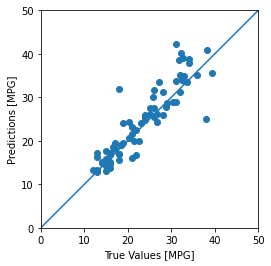

In [283]:
test_predictions = model.predict(x_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
